1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [115]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [116]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [117]:
file_n = "./data/data_000637.txt" 
line_index = len(open(file_n).readlines())-1
N = max(10000,round(line_index))

df = pd.read_csv(file_n, nrows=N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [118]:
N = 12000

orb = df["BX_COUNTER"]
max_bx = orb.max()

print("The number of BX in ORBIT is ", max_bx)

The number of BX in ORBIT is  3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [119]:

def time(orb,bx,tdc,max):
    return  (orb*max*25)+ (bx*25) + ((25/30)*tdc)

df['ABS_TIME'] = time(df['ORBIT_CNT'], df['BX_COUNTER'], df['TDC_MEAS'],max_bx)
df['ABS_TIME_SERIES'] = pd.to_datetime(df['ABS_TIME'])
#df

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [120]:
print(df['ABS_TIME_SERIES'][len(df)-1] - df['ABS_TIME_SERIES'][0])

0 days 00:00:00.980140994


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [121]:
temp = df.groupby('TDC_CHANNEL').size().sort_values(ascending=False)
temp.iloc[[0,1,2]]

TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [122]:
not_null_col = df.groupby(['ORBIT_CNT']).count()
print(len(not_null_col))


11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [123]:
print(len(df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].unique()))

10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [124]:
FPGA_0 = df[df['FPGA']==0]
FPGA_1 = df[df['FPGA']==1]

print("FPGA_0: \n ",pd.Series(FPGA_0.groupby('TDC_CHANNEL').size()))
print("FPGA_1: \n ",pd.Series(FPGA_1.groupby('TDC_CHANNEL').size()))


FPGA_0: 
  TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Length: 124, dtype: int64
FPGA_1: 
  TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

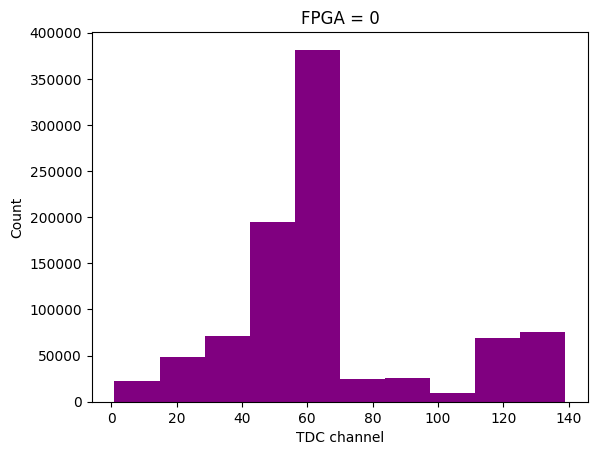

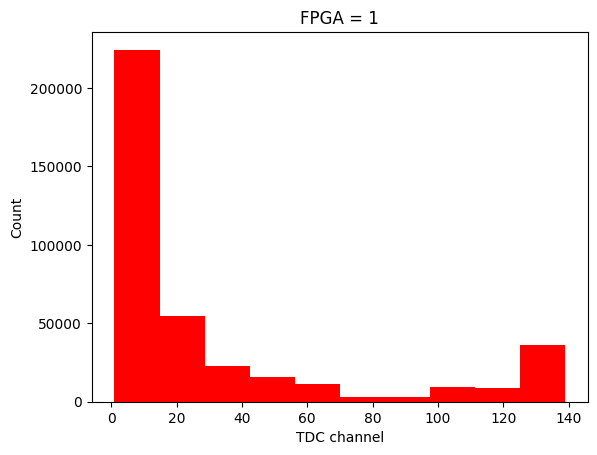

In [125]:
h0 = FPGA_0.hist(column = 'TDC_CHANNEL', grid = False, color = 'purple')
plt.title('FPGA = 0')
plt.xlabel('TDC channel')
plt.ylabel('Count')

h1 = FPGA_1.hist(column = 'TDC_CHANNEL', grid = False, color = 'red')
plt.title('FPGA = 1')
plt.xlabel('TDC channel')
plt.ylabel('Count')

plt.show()